In [2]:
#Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#importar o dataframe

data = pd.read_csv('20210601_Casos-e-obitos-ESP.csv', sep=";")

FileNotFoundError: [Errno 2] No such file or directory: '20210601_Casos-e-obitos-ESP.csv'

In [4]:
#Existe diferença de incidência de covid entre homens e mulheres?

#no dataframe, fazer a contagem de valores na coluna Genero e ordenar de forma decrescente.

data.Genero.value_counts().sort_values(ascending=False) #check
Qtd_Genero = data.Genero.value_counts().sort_values(ascending=False) #defini uma variável

#Comando para print da resposta do primeiro item
#Em format, primeiro será atribuido o índice com maior valor e depois a quantidade de casos.

print('O gênero com maior incidência é o {} com {} casos, com {} casos a mais que o do gênero {} '.format(Qtd_Genero.index.tolist()[0],Qtd_Genero[0],(Qtd_Genero[0]-Qtd_Genero[1]),Qtd_Genero.index.tolist()[1] ))

O gênero com maior incidência é o FEMININO com 1774807 casos, com 216149 casos a mais que o do gênero MASCULINO 


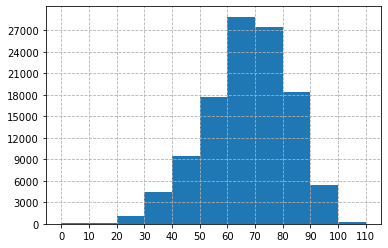

In [4]:
#Faça um gráfico da mortalidade por faixas de idade

#Checar a quantidade de mortos por genero data.Genero[ idxObito ].value_counts()

#plotar o gráfico com a condição de Óbito = 1, entre 0 à 120 com espaçamento de 10(nas idades)
#onde a grade será tracejada 
#no eixo x entre 0 à 120 com espaçado em 10
#no eixo y de 0 à 30.000 espaçado em 3.000
#escolhi esses espaçamento para facilitar a visualização
#salvar o gráfico com o tamanho aumentado

plt.hist(data.Idade[ ( data['Obito'] == 1 ) ], bins=range(0,120,10))
plt.grid(linestyle='--')
plt.xticks(np.arange(0, 120, step=10))
plt.yticks(np.arange(0, 30000, step=3000))
plt.savefig('fig.png', dpi=200)

In [5]:
# Qual a doença pré-existente mais provável de se encontrar numa pessoa com covid?

# A lista de todas as colunas data.columns.tolist()
# Aloquei todas as colunas das doenças em dataHeader
dataHeader = data.columns.tolist()
# filtrei apenas as colunas da doenças
doencas = data.filter(items = dataHeader[2:-4])
# Depois fiz a contagem para valores de doenças = SIM, de forma decrescente
doencas[doencas == 'SIM'].count().sort_values(ascending=False)
# Atribuí o índice a uma variaável e a quantidade de casos para outra variável
ind_doenca_provavel = doencas[doencas == 'SIM'].count().sort_values(ascending=False).idxmax()
qtdcasos_doenca_provavel = doencas[doencas == 'SIM'].count().sort_values(ascending=False)[0]
# print da resposta

print("A doença mais provável = {} com {} casos registrados.".format(ind_doenca_provavel,qtdcasos_doenca_provavel))

A doença mais provável = Cardiopatia com 288976 casos registrados.


In [7]:
#Baseado nesses dados, faça um modelo que estime a probabilidade da pessoa morrer, uma vez que está contaminada com covid, 
#e considerando os inputs de idade, gênero e doenças pré-existentes.

#Inicialmente pareceu um problema simples e depois conforme fui analisando e estudando o problema fui percebendo vários 
#casos onde deveriam ter uma atenção especial:

#Algumas doenças pré-existentes matam mais que outras em pessoas com covid-19 (Para verificar, data.Genero[ (data['Obito']==1)].value_counts())
#Assim, para calcular a probabilidade sempre levei em consideração pessoas que tinham as mesmas doenças pré-existentes
#Existe uma diferença de mortes entre os gêneros() (Para verificar, data.Genero[( data['Obito'] == 1 )].value_counts() )
#onde apesar de termos mais mulheres infectadas, mais homens morrem.
#Existe uma diferença grande de mortes entre diferentes idades (Questão 2)
#Assim ficou complicado estimar quanto cada permutação de doença pré-existente mata em cada faixa de idade, então resolvi calcular
#como expliquei anteriormente, pois assim consigo atingir a maioria dos casos com uma boa precisão.

#Para criar o modelo eu separei em três cenários possíveis

#1) Para calcular casos mais frequentes, separei pessoas com as mesmas doenças pré-existentes, mesmo gênero e com idades próximas,
#para calcular apenas somei a quantidade de pessoas que morreram com essas características e dividi pela quantidade total
#de casos com as mesmas características e multipliquei por 100 para encontrar a porcentagem.

#2) Para casos muito raros/únicos de doenças pré-existentes (imaginei uma criança de 1 ano de idade do gênero feminino com asma e diabetes),
#não existe amostragem para este caso, podendo entregar valores absurdos se utilizar o mesmo método de 1)
#como estou utilizando somente esse banco de dados, meu modelo irá retornar que não será possível calcular uma probabilidade.

#3) Para casos não frequentes mas também não tão raros, aumentei a faixa de idade (próxima ao do entrevistado) e também levei 
#em consideração todos os gêneros, o método irá retornar a probabilidade, mas devido a essas considerações a precisão diminui,
#alertando o usuário.

#Meu modelo inicia fazendo perguntas ao entrevistado e assim conseguindo os inputs e salvando as respostas.

#primeiro pergunto o gênero da pessoa
genero = input('Qual seu gênero? M para Masculino ou F para Feminino: ')
#caso a pessoa responda Masculino/M/m/Masculino/masculino, genero será (data['Genero'] == 'MASCULINO') 
#se não (data['Genero'] == 'FEMININO')
if genero in ['MASCULINO', 'Masculino','M','m','masculino']:
    genero = (data['Genero'] == 'MASCULINO')
else:
    genero = (data['Genero'] == 'FEMININO')
#Aqui eu salvo a resposta em idade (número inteiro) e pulo uma linha com o print(" ") 
idade = int(input('Digite sua Idade: '))
print(" ")
#Agora começo as perguntas sobre as doenças e vou salvando cada resposta, se for SIM/Sim/s/S a 'doencaN' será 
#(data['doençaN'] == 'SIM') se não ((data['doençaN'] == 'NÃO') | (data['doençaN'] == 'IGNORADO')) porque no dataframe temos casos 
#de não e ignorado, também cria uma resposta que vale 1 ou 0, dependendo da resposta do entrevistado que explico logo a seguir
#a sua aplicação.
d0 = input('Você possui asma? S/N ')

if d0 in ['Sim', 'SIM', 's', 'S']:
    d0r = 1
    asmaN = (data['Asma'] == 'SIM')
else:
    d0r = 0
    asmaN = ((data['Asma'] == 'NÃO') | (data['Asma'] == 'IGNORADO'))
#Pergunto sobre a diabetes
d1 = input('Você possui diabetes? S/N ')

if d1 in ['Sim', 'SIM', 's', 'S']:
    d1r = 1
    diabeteN = (data['Diabetes'] == 'SIM')
else:
    d1r = 0
    diabeteN = ((data['Diabetes'] == 'NÃO') | (data['Diabetes'] == 'IGNORADO'))
#Pergunto sobre a cardiopatia
d2 = input('Você pousui cardiopatia? S/N ')

if d2 in ['Sim', 'SIM', 's', 'S']:
    d2r = 1
    cardiopatiaN = (data['Cardiopatia'] == 'SIM')
else:
    d2r = 0
    cardiopatiaN = ((data['Cardiopatia'] == 'NÃO') | (data['Cardiopatia'] == 'IGNORADO'))
#Pergunto sobre Doençcas Hematológicas   
d3 = input('Você pousui alguma doença hematológica? S/N ')

if d3 in ['Sim', 'SIM', 's', 'S']:
    d3r = 1
    doenca_hematologicaN = (data['Doenca Hematologica'] == 'SIM')
else:
    d3r = 0
    doenca_hematologicaN = ((data['Doenca Hematologica'] == 'NÃO') | (data['Doenca Hematologica'] == 'IGNORADO'))    
#Pergunto sobre Doençcas Hepáticas
d4 = input('Você pousui alguma doença hepática? S/N ')

if d4 in ['Sim', 'SIM', 's', 'S']:
    d4r = 1
    doenca_hepaticaN = (data['Doenca Hepatica'] == 'SIM')
else:
    d4r = 0
    doenca_hepaticaN = ((data['Doenca Hepatica'] == 'NÃO') | (data['Doenca Hepatica'] == 'IGNORADO'))
#Pergunto sobre doençcas neurológicas   
d5 = input('Você pousui alguma doença neurológica? S/N ')

if d5 in ['Sim', 'SIM', 's', 'S']:
    d5r = 1
    doenca_neurologicaN = (data['Doenca Neurologica'] == 'SIM')
else:
    d5r = 0
    doenca_neurologicaN = ((data['Doenca Neurologica'] == 'NÃO') | (data['Doenca Neurologica'] == 'IGNORADO'))
#Pergunto sobre doenças renais    
d6 = input('Você pousui alguma doença renal? S/N ')

if d6 in ['Sim', 'SIM', 's', 'S']:
    d6r = 1
    doenca_renalN = (data['Doenca Renal'] == 'SIM')
else:
    d6r = 0
    doenca_renalN = ((data['Doenca Renal'] == 'NÃO') | (data['Doenca Renal'] == 'IGNORADO'))
#Pergunto sobre a imunodepressão    
d7 = input('Você pousui imunodepressão? S/N ')

if d7 in ['Sim', 'SIM', 's', 'S']:
    d7r = 1
    imunodepressaoN = (data['Imunodepressao'] == 'SIM')
else:
    d7r = 0
    imunodepressaoN = ((data['Imunodepressao'] == 'NÃO') | (data['Imunodepressao'] == 'IGNORADO'))
#Pergunto sobre obesidade    
d8 = input('Você sofre de obesidade? S/N ')

if d8 in ['Sim', 'SIM', 's', 'S']:
    d8r = 1
    obesidadeN = (data['Obesidade'] == 'SIM')
else:
    d8r = 0
    obesidadeN = ((data['Obesidade'] == 'NÃO') | (data['Obesidade'] == 'IGNORADO'))
#Pergunto sobre pneumopatia    
d9 = input('Você pousui pneumopatia? S/N ')

if d9 in ['Sim', 'SIM', 's', 'S']:
    d9r = 1
    pneumopatiaN = (data['Pneumopatia'] == 'SIM')
else:
    d9r = 0
    pneumopatiaN = ((data['Pneumopatia'] == 'NÃO') | (data['Pneumopatia'] == 'IGNORADO'))
#Pergunto sobre a Puérpera    
d10 = input('Você deu a luz faz pouco tempo? S/N ')

if d10 in ['Sim', 'SIM', 's', 'S']:
    d10r = 1
    puerperaN = (data['Puérpera'] == 'SIM')
else:
    d10r = 0
    puerperaN = ((data['Puérpera'] == 'NÃO') | (data['Puérpera'] == 'IGNORADO'))
#Pergunto sobre a Síndrome De Down    
d11 = input('Você possui Tricossomia 21 ou Síndrome de Down? S/N ')

if d11 in ['Sim', 'SIM', 's', 'S']:
    d11r = 1
    sindromededownN = (data['Síndrome De Down'] == 'SIM')
else:
    d11r = 0
    sindromededownN = ((data['Síndrome De Down'] == 'NÃO') | (data['Síndrome De Down'] == 'IGNORADO'))
#Pergunto se existe outro fator de risco    
d12 = input('Você pousui algum outro fator considerado de risco? S/N ')

if d12 in ['Sim', 'SIM', 's', 'S']:
    d12r = 1
    outrosfatoresN = (data['Outros Fatores De Risco'] == 'SIM')
else:
    d12r = 0
    outrosfatoresN = ((data['Outros Fatores De Risco'] == 'NÃO') | (data['Outros Fatores De Risco'] == 'IGNORADO'))    

#Aqui eu salvo em idadex as idades próximas do usuário (-3 até +3) que serão consideradas para o cálculo da probabilidade
#Aqui também salvo morte como um "filtro" para encontrar as pessoas que morreram.
idadex = ((data['Idade'] >= idade-3) & (data['Idade']<=idade+3))
morte = (data['Obito'] == 1)

#Aqui eu crio 3 variáveis, das quais 2 serão responsáveis para determinar qual o caso do usuário e a outra para o cálculo.

#eu utilizei a ferramenta loc, onde ela irá localizar todos os casos idênticos ao do entrevistado (só com a faixa de idade alterada),
#depois eu aplico count() para saber quantos casos existem, e depois pego o valor do índice[0] para pegar o número inteiro e
#assim consigo calcular a probabilidade

#teste tem como papel contabilizar a quantidade de casos iguais ao do entrevistado
teste = data.loc[genero&idadex&asmaN&diabeteN&cardiopatiaN&doenca_hematologicaN&doenca_hepaticaN&doenca_neurologicaN&doenca_renalN&imunodepressaoN&obesidadeN&pneumopatiaN&puerperaN&sindromededownN&outrosfatoresN&morte].count()[0]
#a probabilidade final irá calcular a (quantidade de mortos iguais ao do entrevistado/quantidade de mortos iguais ao do entrevistado)*100
#calculando assim a probabilidade (em porcentagem do entrevistado vir a obito)
probabilidadefinal = (data.loc[genero&idadex&asmaN&diabeteN&cardiopatiaN&doenca_hematologicaN&doenca_hepaticaN&doenca_neurologicaN&doenca_renalN&imunodepressaoN&obesidadeN&pneumopatiaN&puerperaN&sindromededownN&outrosfatoresN&morte].count()[0]*100/data.loc[genero&idadex&asmaN&diabeteN&cardiopatiaN&doenca_hematologicaN&doenca_hepaticaN&doenca_neurologicaN&doenca_renalN&imunodepressaoN&obesidadeN&pneumopatiaN&puerperaN&sindromededownN&outrosfatoresN].count()[0])
#dnrtotal contabiliza o número de doenças pré-existentes que o entrevistado tem
dnrtotal = d0r+d1r+d2r+d3r+d4r+d5r+d6r+d7r+d8r+d9r+d10r+d11r+d12r

if teste ==0: #caso não existam casos iguais ao do entrevistado, o método informa que não foi possível calcular
    print(" ")
    print("Infelizmente seu caso é único e não foi possível estimar uma probabilidade de óbito com os microdados do Estado de São Paulo.")
elif dnrtotal>2: #caso o numero de doenças seja igual a 3 ou mais, o cálculo aumentará a faixa de idade e também irá considerar os dois gêneros
    genero = ((data['Genero'] == 'FEMININO') | (data['Genero'] == 'MASCULINO'))
    idadex = ((data['Idade'] >= idade-10) & (data['Idade']<=idade+10))
    print("De arcodo com os microdados do Estado de São Paulo e com pouca precisão, a probabilidade de você vir à óbito é de {}%".format(np.round(probabilidadefinal, 2))) 
else: #caso seja um caso frequente (número de doenças pré-existentes < 3 e teste difernete de 0), ele calcula normalmente a probabilidade
    print(" ")
    print("De acordo com os microdados do Estado de São Paulo, a probabilidade de você vir à óbito é de {}%.".format(np.round(probabilidadefinal, 2)))  

#comando para verificar o dataframe para os casos que o método está avaliando***
#data.loc[genero&idadex&asmaN&diabeteN&cardiopatiaN&doenca_hematologicaN&doenca_hepaticaN&doenca_neurologicaN&doenca_renalN&imunodepressaoN&obesidadeN&pneumopatiaN&puerperaN&sindromededownN&outrosfatoresN]


Qual seu gênero? M para Masculino ou F para Feminino: M
Digite sua Idade: 30
 
Você possui asma? S/N n
Você possui diabetes? S/N n
Você pousui cardiopatia? S/N n
Você pousui alguma doença hematológica? S/N n
Você pousui alguma doença hepática? S/N n
Você pousui alguma doença neurológica? S/N n
Você pousui alguma doença renal? S/N n
Você pousui imunodepressão? S/N n
Você sofre de obesidade? S/N n
Você pousui pneumopatia? S/N n
Você deu a luz faz pouco tempo? S/N n
Você possui Tricossomia 21 ou Síndrome de Down? S/N n
Você pousui algum outro fator considerado de risco? S/N n
 
De acordo com os microdados do Estado de São Paulo, a probabilidade de você vir à óbito é de 0.19%.
